<a href="https://colab.research.google.com/github/jarrydmartinx/supervised-learning/blob/master/Dogs%2BCats_Classification_with_Keras_and_Tensorflow_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

# from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow_datasets as tfds
import os
import numpy as np

import pandas as pd
import plotnine as gg
import matplotlib.pyplot as plt

tf.get_logger().setLevel('INFO')

ERROR! Session/line number was not unique in database. History logging moved to new session 59


In [0]:
from PIL import Image

# Data

## Load the data

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# download and extract data and return the filepath
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [0]:
train_dir = os.path.join(PATH, 'train')
val_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(PATH, 'train/cats')
train_dogs_dir = os.path.join(PATH, 'train/dogs')
validation_cats_dir = os.path.join(PATH, 'validation/cats')
validation_dogs_dir = os.path.join(PATH, 'validation/dogs')

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

num_tr = num_cats_tr + num_dogs_tr
num_val = num_cats_val + num_dogs_val

## Inspect the data

In [11]:
print(f'training images of cats: {num_cats_tr}')
print(f'training images of dogs: {num_dogs_tr}')
print(f'validation images of cats: {num_cats_val}')
print(f'validation images of dogs: {num_dogs_val}')
print("----------")
print(f"total training images: {num_tr}")
print(f"total validation images: {num_val}")

training images of cats: 1000
training images of dogs: 1000
validation images of cats: 500
validation images of dogs: 500
----------
total training images: 2000
total validation images: 1000


In [12]:
# Look at the sizes of the images

sample_imgs = os.listdir(train_cats_dir)[:5]
print(sample_imgs)
sizes = []
%cd {train_cats_dir}
for sample in sample_imgs:
  img = Image.open(sample)
  sizes.append(img.size)
%cd /content/
print(sizes)

['cat.859.jpg', 'cat.424.jpg', 'cat.73.jpg', 'cat.548.jpg', 'cat.51.jpg']
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/content
[(489, 369), (499, 223), (499, 375), (499, 375), (256, 473)]


## Preprocess the data

In [0]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
train_generator = ImageDataGenerator(rescale=1./255)
validation_generator = ImageDataGenerator(rescale=1./255)

In [15]:
# Load the images from the disk, rescale, and resize

train_gen = train_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

val_gen = validation_generator.flow_from_directory(batch_size=batch_size,
                                                        directory=val_dir,
                                                        shuffle=True,
                                                        target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Visualise the Images

In [0]:
# extract a batch of images
sample_training_images, _ = next(train_gen)
def plot_images(images):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20)) # this gives me the axes on which i'll display the images in the fig
  axes = axes.flatten() # why
  for img, ax in zip(images, axes): 
    ax.imshow(img) # show img on ax
    ax.axis('off')
  plt.tight_layout()
  plt.show()

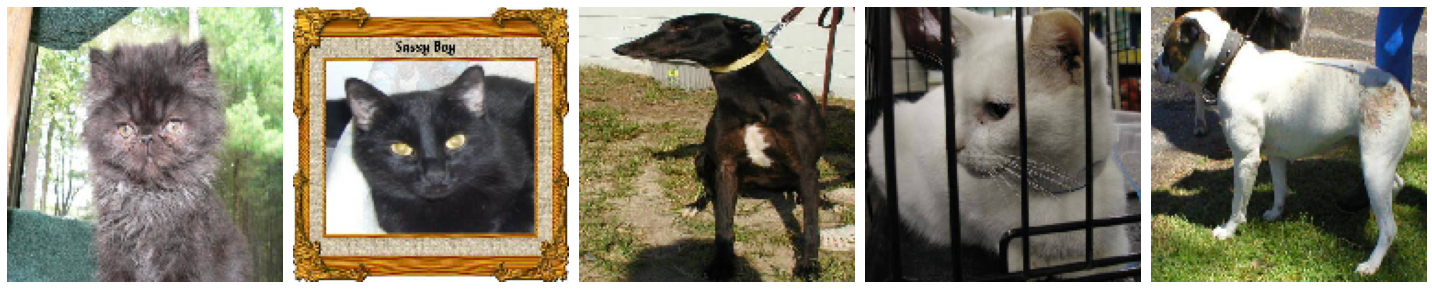

In [17]:
plot_images(sample_training_images[:5])

# Model

## Build the model

In [18]:
model = Sequential([
                     Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
                     MaxPooling2D(),
                     Conv2D(32, 3, padding='same', activation='relu'),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(512, activation='relu'),
                     Dense(1) # for binary classification
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Compile the Model

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43808)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               22430208  
____________________________

## Train the model

Use the `fit_generator` method of the `ImageDataGenerator` class to train the network

In [20]:
history = model.fit_generator(
    train_gen,
    steps_per_epoch=(num_tr // batch_size),
    epochs=epochs,
    validation_data=val_gen,
    validation_steps=(num_val // batch_size)
)

Epoch 1/15
15/15 [==============================] - 11s 763ms/step - loss: 2.5383 - acc: 0.5171 - val_loss: 0.7427 - val_acc: 0.5156
Epoch 2/15
15/15 [==============================] - 8s 507ms/step - loss: 0.7009 - acc: 0.5075 - val_loss: 0.6959 - val_acc: 0.5033
Epoch 3/15
15/15 [==============================] - 7s 499ms/step - loss: 0.6905 - acc: 0.5080 - val_loss: 0.6867 - val_acc: 0.5033
Epoch 4/15
15/15 [==============================] - 7s 491ms/step - loss: 0.6719 - acc: 0.4925 - val_loss: 0.6661 - val_acc: 0.5033
Epoch 5/15
15/15 [==============================] - 7s 481ms/step - loss: 0.6189 - acc: 0.5906 - val_loss: 0.6100 - val_acc: 0.6953
Epoch 6/15
15/15 [==============================] - 7s 489ms/step - loss: 0.5877 - acc: 0.6820 - val_loss: 0.5979 - val_acc: 0.6462
Epoch 7/15
15/15 [==============================] - 7s 489ms/step - loss: 0.5331 - acc: 0.6984 - val_loss: 0.6228 - val_acc: 0.6864
Epoch 8/15
15/15 [==============================] - 7s 461ms/step - loss: 0

## Visualize the results

In [21]:
#@title Inspect history object
print(history)
print(history.history.keys())

print(f"epochs: {len(history.history['loss'])}")

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
epochs: 15


In [22]:
df = pd.DataFrame(history.history)
df['epoch'] = range(epochs)
df.head()

,loss,acc,val_loss,val_acc,epoch
0,2.580838,0.517094,0.742653,0.515625,0
1,0.700893,0.507479,0.695918,0.503348,1
2,0.690456,0.508013,0.686714,0.503348,2
3,0.672204,0.492521,0.666139,0.503348,3
4,0.618856,0.590625,0.610009,0.695312,4


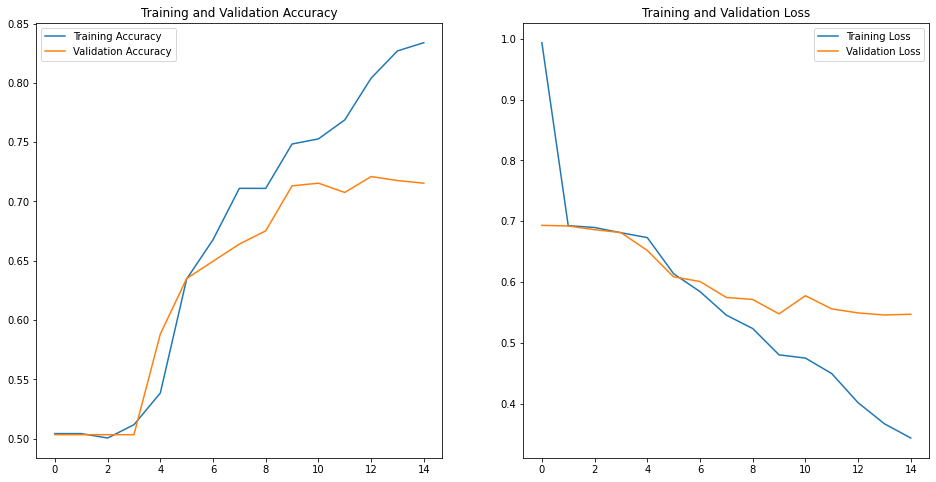

In [43]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

t = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(t, train_acc, label='Training Accuracy')
plt.plot(t, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(t, train_loss, label='Training Loss')
plt.plot(t, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

# Creating a new network with Dropouts

We apply dropout to the first and last pooling layers. We randomly set 20% of the neurons to zero during each training epoch. This helps to avoid overfitting on the training dataset.

In [0]:
model_dropout = Sequential([
    Conv2D(16, 3, padding='same', activation='relu',
           input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Dropout(0.2), # applies dropout to preceding MaxPooling2D layer
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2), # applies dropout to preceding MaxPooling2D layer
    Flatten(), 
    Dense(512, activation='relu'),
    Dense(1)
])

In [33]:
model_dropout.compile(optimizer='adam',
                      loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                      metrics=['accuracy'])

model_dropout.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 18, 18, 64)       

In [36]:
#@title Train the model with dropout

history = model_dropout.fit_generator(
    train_gen,
    steps_per_epoch=(num_tr // batch_size),
    epochs=epochs,
    validation_data=val_gen,
    validation_steps=(num_val // batch_size)
)

Epoch 1/15
15/15 [==============================] - 8s 528ms/step - loss: 0.9866 - acc: 0.5043 - val_loss: 0.6931 - val_acc: 0.5033
Epoch 2/15
15/15 [==============================] - 8s 501ms/step - loss: 0.6926 - acc: 0.5043 - val_loss: 0.6921 - val_acc: 0.5033
Epoch 3/15
15/15 [==============================] - 7s 491ms/step - loss: 0.6895 - acc: 0.5005 - val_loss: 0.6860 - val_acc: 0.5033
Epoch 4/15
15/15 [==============================] - 7s 494ms/step - loss: 0.6807 - acc: 0.5118 - val_loss: 0.6812 - val_acc: 0.5033
Epoch 5/15
15/15 [==============================] - 7s 483ms/step - loss: 0.6725 - acc: 0.5385 - val_loss: 0.6518 - val_acc: 0.5882
Epoch 6/15
15/15 [==============================] - 7s 480ms/step - loss: 0.6133 - acc: 0.6346 - val_loss: 0.6084 - val_acc: 0.6350
Epoch 7/15
15/15 [==============================] - 7s 483ms/step - loss: 0.5842 - acc: 0.6677 - val_loss: 0.6008 - val_acc: 0.6496
Epoch 8/15
15/15 [==============================] - 7s 461ms/step - loss: 0.

### Visualise the accuracy of the model

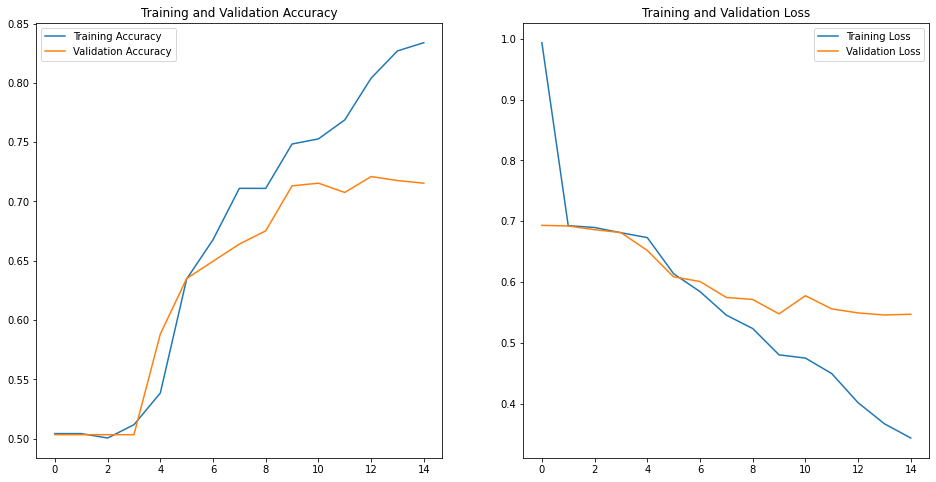

In [42]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

t = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(t, train_acc, label='Training Accuracy')
plt.plot(t, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(t, train_loss, label='Training Loss')
plt.plot(t, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()